# 1. Imports

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data source file

In [4]:
df_raw = pd.read_csv('dataset/train.csv')
df = df_raw.copy()
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. EDA

## 2.1 Données manquantes

In [5]:
# Somme totale des valeurs manquantes dans le dataframe
total_missing = df.isna().sum().sum()
print(f"Il y a {total_missing} valeurs manquantes dans le dataset.")

# Taille du dataframe
df_size = df.size
print(f"Le dataset contient {df_size} valeurs.")

# Separator
print("-" * 50)

# Pourcentage de valeurs manquantes
missing_percentage = total_missing / df_size * 100
print(f"Le dataset contient {missing_percentage:.2f}% de valeurs manquantes.")

Il y a 7829 valeurs manquantes dans le dataset.
Le dataset contient 118260 valeurs.
--------------------------------------------------
Le dataset contient 6.62% de valeurs manquantes.


## 2.2 Histogramme

### 2.2.1 SalePrice

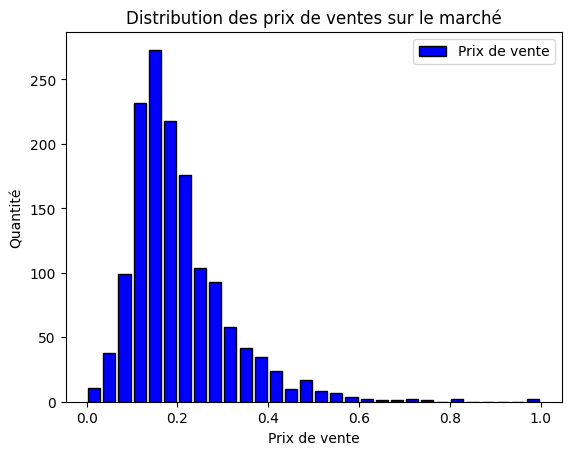

In [29]:
plt.hist(df['SalePrice'],
         bins=30,
         rwidth=0.8,
         color='blue',
         edgecolor='black',
         label='Prix de vente')
plt.xlabel('Prix de vente')
plt.ylabel('Quantité')
plt.title('Distribution des prix de ventes sur le marché')
plt.legend()
plt.show()

### Corrélation et Histogramme

In [7]:
# Normalisation Min Max
df['SalePrice'] = (df['SalePrice'] - df['SalePrice'].min()) / (df['SalePrice'].max() - df['SalePrice'].min())
df['GrLivArea'] = (df['GrLivArea'] - df['GrLivArea'].min()) / (df['GrLivArea'].max() - df['GrLivArea'].min())

In [31]:
print(df[['SalePrice', 'GrLivArea']].head())

   SalePrice  GrLivArea
0   0.241078   0.259231
1   0.203583   0.174830
2   0.261908   0.273549
3   0.145952   0.260550
4   0.298709   0.351168


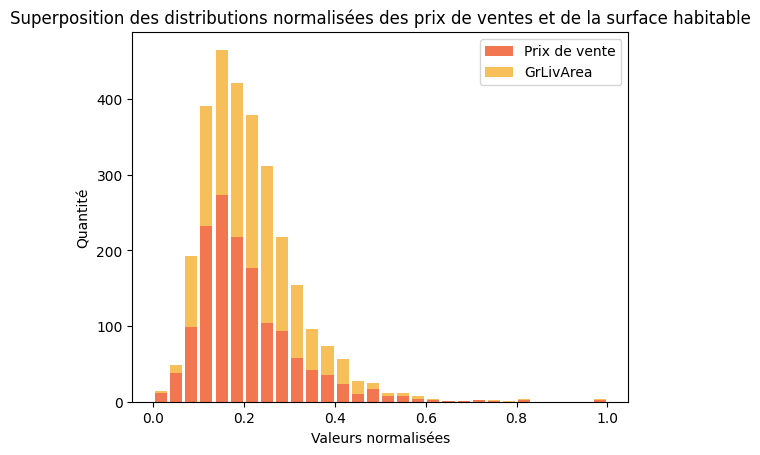

In [13]:
plt.hist([df['SalePrice'], df['GrLivArea']],         
         bins=30,
         rwidth=0.8,
         color=['#f27750', '#f7bf59'],
         histtype = 'barstacked',
         label=['Prix de vente', 'GrLivArea'])
plt.xlabel('Valeurs normalisées')
plt.ylabel('Quantité')
plt.title('Superposition des distributions normalisées des prix de ventes et de la surface habitable')
plt.legend()
plt.show()

// Analyse du graphique :
En superposant les valeurs normalisées des Prix de Vente avec la surface habitable, on peut constater que les deux distributions semblent suivrent la même loi de probabilité normale asymétrique avec une tendance centrale située entre la position en abscisse 0.16 et 0.2 environ. 
On pourrait déduire que les deux variables sont corrélées, toutefois cet histogramme ne nous donne pas d'indicateurs pertinents comme des indicateurs de position (quantile par exemple) ou de dispersion (écart-type ou variance par exemple). Pour confirmer cela, il serait nécessaire de comparer ces variables avec des boxplots ou des Q-Q plots voire même de calculer le coefficient de corrélation.

### Histogramme 2D

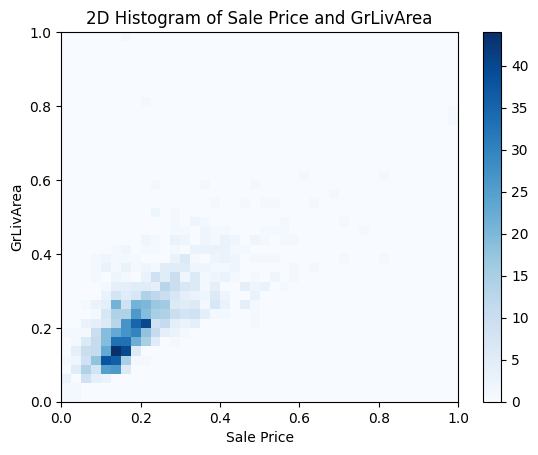

In [33]:
plt.hist2d(df['SalePrice'], df['GrLivArea'], bins=40, cmap='Blues')
plt.colorbar()
plt.xlabel('Sale Price')
plt.ylabel('GrLivArea')
plt.title('2D Histogram of Sale Price and GrLivArea')
plt.show()


// Interprétation

## 2.3 Scatter et corrélation

In [34]:
df = pd.read_csv('dataset/train.csv')

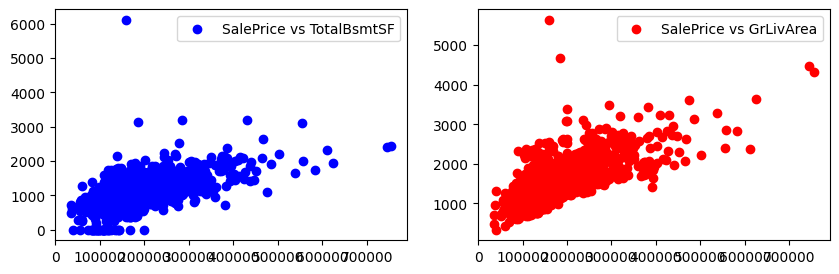

In [39]:
fig = plt.figure(figsize=(10,3))

plt.subplot(121)
plt.scatter(df['SalePrice'], df['TotalBsmtSF'], color='blue', label='SalePrice vs TotalBsmtSF')
plt.legend()

plt.subplot(122)
plt.scatter(df['SalePrice'], df['GrLivArea'], color='red', label='SalePrice vs GrLivArea')
plt.legend()

plt.show()

// Analyse des deux graphiques et relation entre les deux données

## 2.4 Boxplots et distribution conditionnelle